# Explore here

In [1]:
import pandas as pd
df = pd.read_csv('../data/raw/StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


Desafío: identificar los principales factores que determinan la calificación de un estudiante

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [3]:
#Filtrar por las columnas de formato objet

#columnas numéricas
cols_num = df._get_numeric_data().columns

#columnas categóricas se pueden representar como la diferencia entre el total de columnas y las columnas numéricas
cols = df.columns
cols_cat = list(set(cols)-set(cols_num))

#agrega una variable numerica terminada en "_num" en el dataframe, que luego utilizafemos para reemplazar las variables categóricas
# si no agregamos la terminación "_num", la variable categorica será reemplazada por una numérica
for col in cols_cat:
    
    df[col+'_num'] = pd.factorize(df[col])[0]
df.info()

#print(df['Parental_Involvement'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Hours_Studied                   6607 non-null   int64 
 1   Attendance                      6607 non-null   int64 
 2   Parental_Involvement            6607 non-null   object
 3   Access_to_Resources             6607 non-null   object
 4   Extracurricular_Activities      6607 non-null   object
 5   Sleep_Hours                     6607 non-null   int64 
 6   Previous_Scores                 6607 non-null   int64 
 7   Motivation_Level                6607 non-null   object
 8   Internet_Access                 6607 non-null   object
 9   Tutoring_Sessions               6607 non-null   int64 
 10  Family_Income                   6607 non-null   object
 11  Teacher_Quality                 6529 non-null   object
 12  School_Type                     6607 non-null   

In [4]:
df_num = df.drop(cols_cat,axis=1)
df_num.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Access_to_Resources_num,Parental_Education_Level_num,Teacher_Quality_num,Motivation_Level_num,Extracurricular_Activities_num,Distance_from_Home_num,Gender_num,Internet_Access_num,Learning_Disabilities_num,Peer_Influence_num,School_Type_num,Family_Income_num,Parental_Involvement_num
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659,0.899803,0.682458,0.481762,0.906463,0.596035,0.491448,0.422733,0.075526,0.105191,0.993038,0.304071,0.787649,1.086423
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456,0.698347,0.799428,0.687190,0.695798,0.490728,0.685173,0.494031,0.264258,0.306823,0.889751,0.460048,0.742617,0.695521
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


In [5]:
#Eliminar "Exam_Score" superior a 100
df_num = df_num[df_num['Exam_Score']<=100]
df_num.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Access_to_Resources_num,Parental_Education_Level_num,Teacher_Quality_num,Motivation_Level_num,Extracurricular_Activities_num,Distance_from_Home_num,Gender_num,Internet_Access_num,Learning_Disabilities_num,Peer_Influence_num,School_Type_num,Family_Income_num,Parental_Involvement_num
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,19.974266,79.974720,7.029216,75.067817,1.493188,2.967605,67.230548,0.899788,0.682561,0.481683,0.906600,0.595973,0.491371,0.422646,0.075386,0.105207,0.993188,0.304117,0.787466,1.086588
std,5.990424,11.546219,1.468177,14.399184,1.229907,1.031309,3.868502,0.698399,0.799444,0.687212,0.695761,0.490740,0.685196,0.494018,0.264033,0.306844,0.889734,0.460067,0.742523,0.695446
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


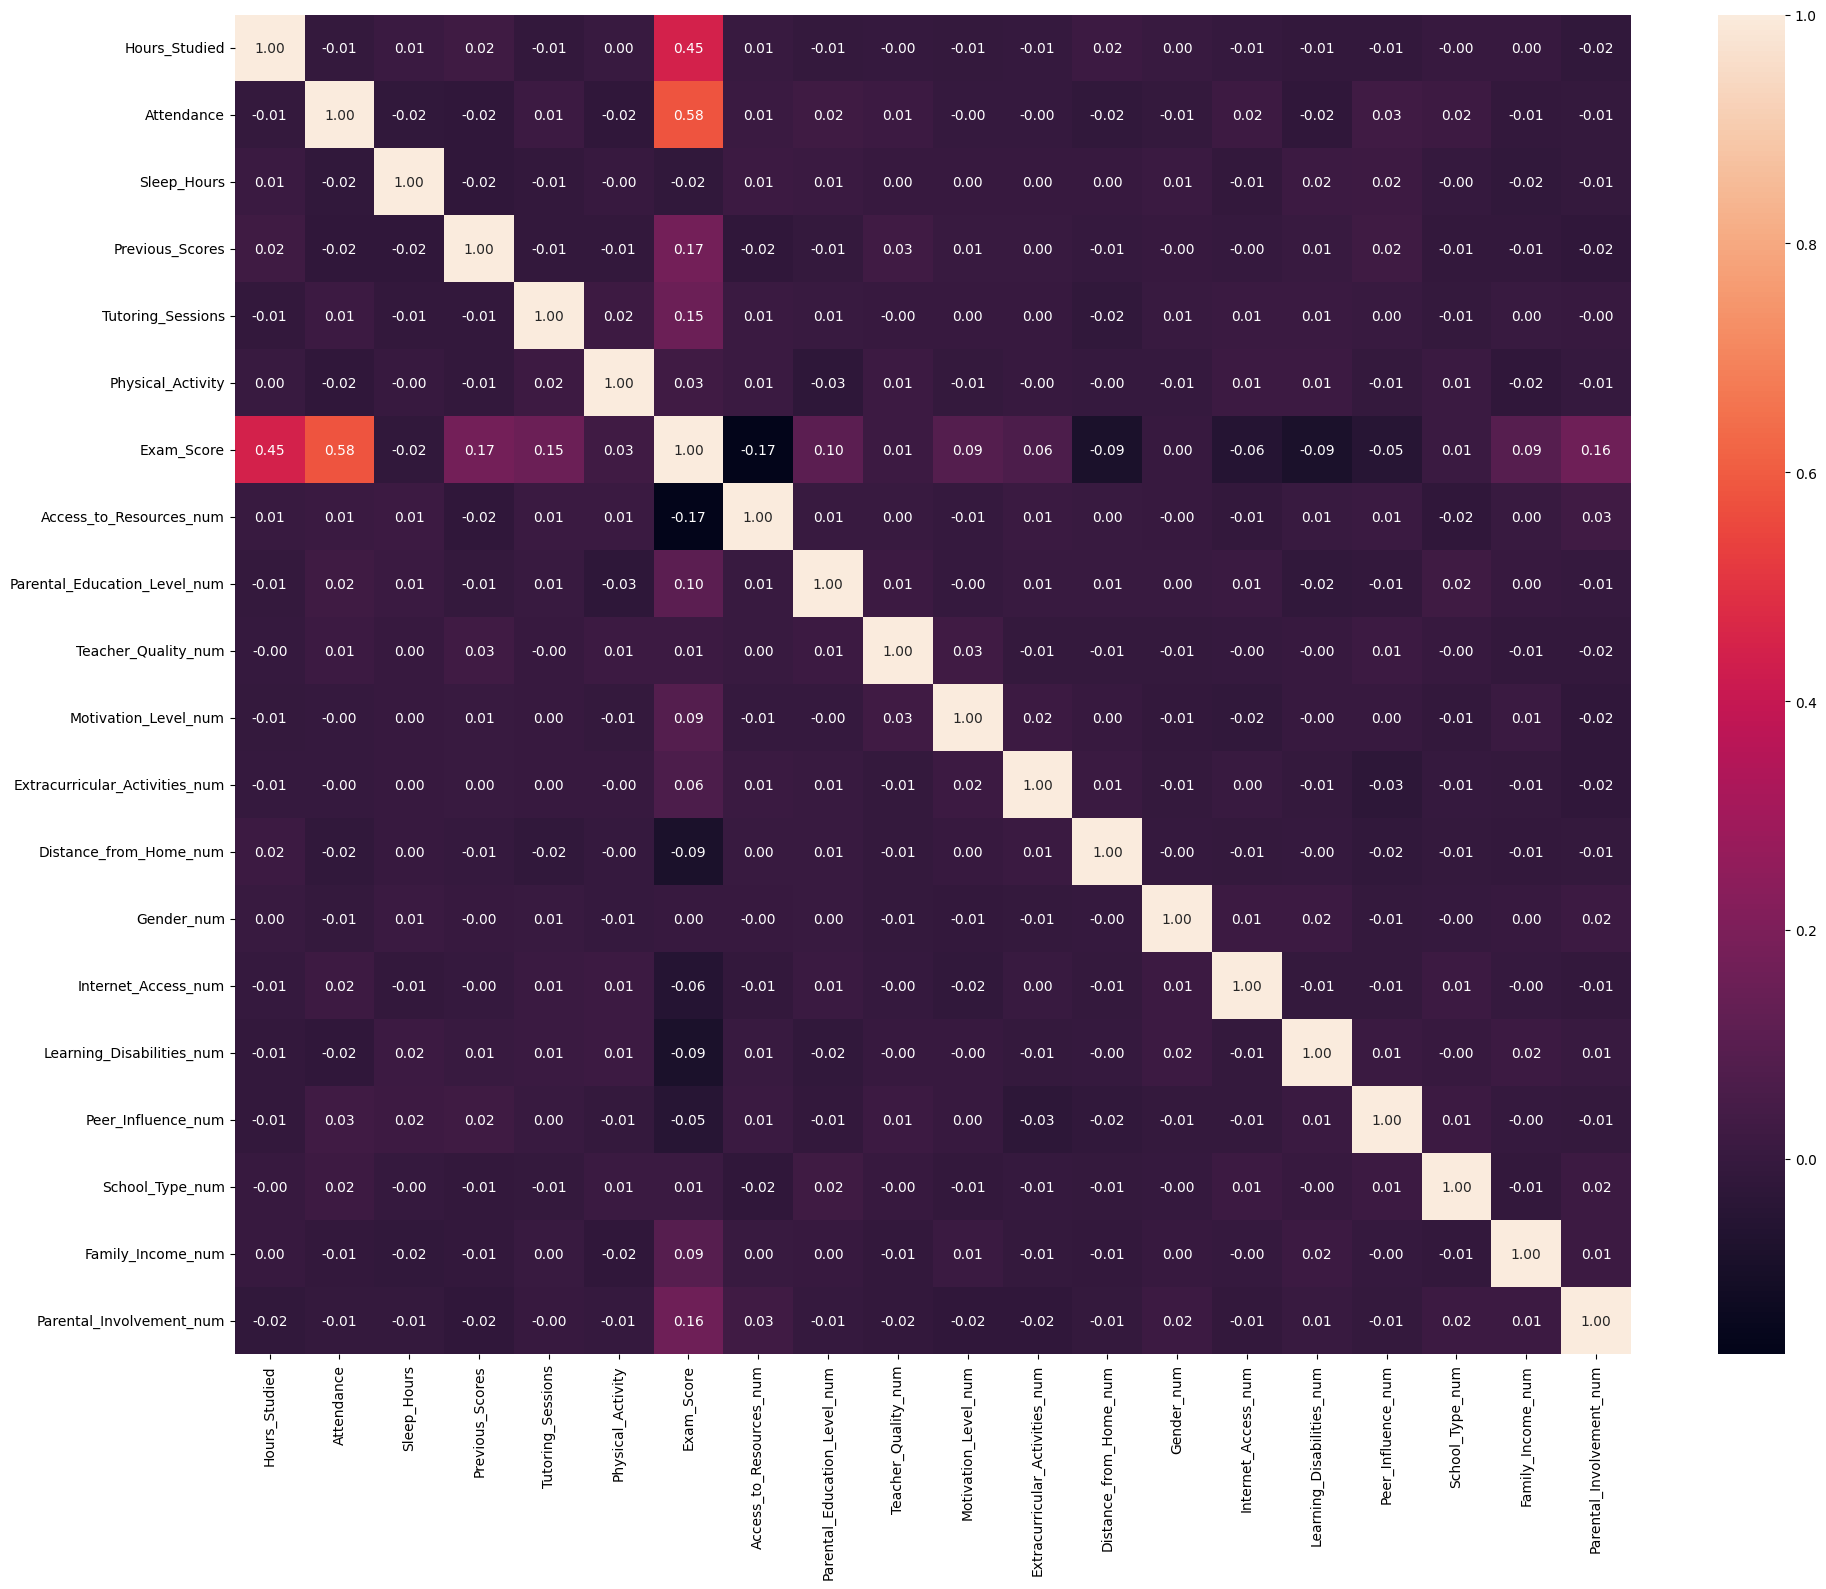

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16)) 
sns.heatmap(df_num.corr(), annot = True, fmt = ".2f")

# Mejorar el espaciado
plt.tight_layout()
plt.show()


In [7]:
df_num.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Access_to_Resources_num', 'Parental_Education_Level_num',
       'Teacher_Quality_num', 'Motivation_Level_num',
       'Extracurricular_Activities_num', 'Distance_from_Home_num',
       'Gender_num', 'Internet_Access_num', 'Learning_Disabilities_num',
       'Peer_Influence_num', 'School_Type_num', 'Family_Income_num',
       'Parental_Involvement_num'],
      dtype='object')

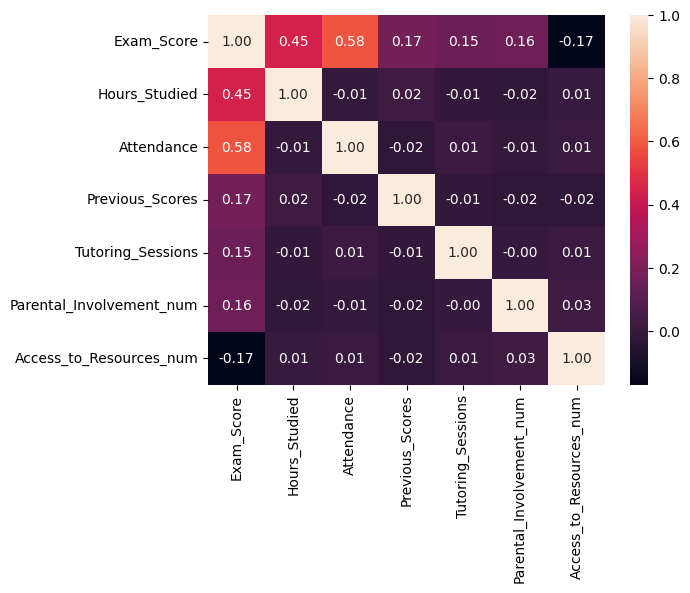

In [8]:
#Priorizar columnas del modelo, criterio aquellas sobre 0,1 y menore a -0,1
#Se observa una correlación cruzada baja (entre -0,3 y 0,3)

df_num1 = df_num[['Exam_Score','Hours_Studied','Attendance','Previous_Scores','Tutoring_Sessions','Parental_Involvement_num','Access_to_Resources_num']]
sns.heatmap(df_num1.corr(), annot = True, fmt = ".2f")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = df_num1.drop('Exam_Score',axis=1)
y = df_num1['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [10]:
X.describe() #util para definir el formato de las variables en la interfaz

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Parental_Involvement_num,Access_to_Resources_num
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,19.974266,79.974720,75.067817,1.493188,1.086588,0.899788
std,5.990424,11.546219,14.399184,1.229907,0.695446,0.698399
min,1.000000,60.000000,50.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,63.000000,1.000000,1.000000,0.000000
50%,20.000000,80.000000,75.000000,1.000000,1.000000,1.000000
75%,24.000000,90.000000,88.000000,2.000000,2.000000,1.000000
max,44.000000,100.000000,100.000000,8.000000,2.000000,2.000000


In [11]:
#para comparar las columnas categoricas con su versión numérica
print(df['Access_to_Resources'].unique())
print(df['Access_to_Resources_num'].unique())
df[['Access_to_Resources','Access_to_Resources_num']]


['High' 'Medium' 'Low']
[0 1 2]


,Access_to_Resources,Access_to_Resources_num
0,High,0
1,Medium,1
2,Medium,1
3,Medium,1
4,Medium,1
...,...,...
6602,Medium,1
6603,Medium,1
6604,Low,2
6605,High,0


In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42) # definir modelo
model.fit(X_train,y_train) # entrenar modelo
y_pred = model.predict(X_test) # realizar predicción

from sklearn.metrics import r2_score, root_mean_squared_error

print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'RMSE score: {root_mean_squared_error(y_test, y_pred)}')

R2 score: 0.673286750403314
RMSE score: 2.078587878962769


In [13]:
print(model.feature_importances_)
print(model.feature_names_in_)

[0.27091255 0.42013256 0.14895255 0.05772593 0.05329413 0.04898228]
['Hours_Studied' 'Attendance' 'Previous_Scores' 'Tutoring_Sessions'
 'Parental_Involvement_num' 'Access_to_Resources_num']


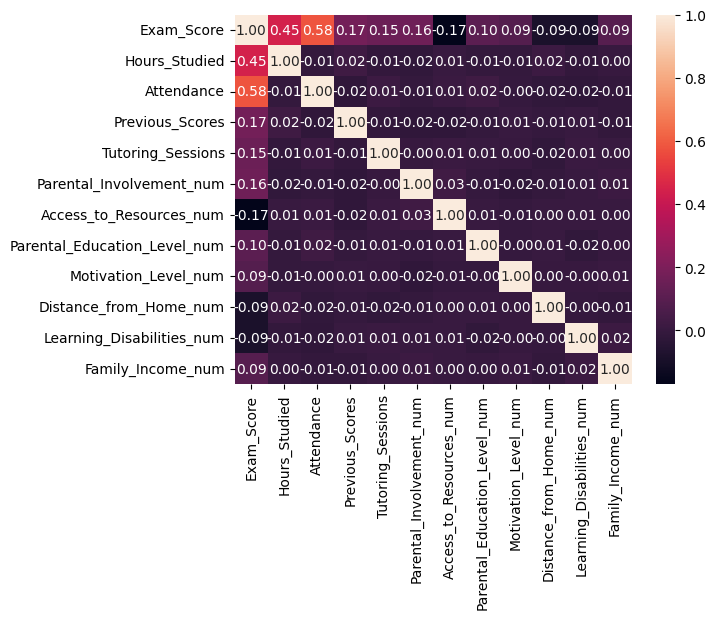

In [14]:
#probaremos un modelo con las 3 variables mas relevantes
df_num2 = df_num[['Exam_Score','Hours_Studied','Attendance','Previous_Scores','Tutoring_Sessions','Parental_Involvement_num','Access_to_Resources_num','Parental_Education_Level_num','Motivation_Level_num','Distance_from_Home_num','Learning_Disabilities_num', 'Family_Income_num']]
sns.heatmap(df_num2.corr(), annot = True, fmt = ".2f")
plt.show()

In [15]:
X_1 = df_num2.drop('Exam_Score',axis=1)
y_1 = df_num2['Exam_Score']

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1,test_size=0.2, random_state = 42)

In [16]:
model1 = RandomForestRegressor(random_state=42) # definir modelo
model1.fit(X_1_train,y_1_train) # entrenar modelo
y_1_pred = model1.predict(X_1_test) # realizar predicción

In [17]:
print(f'R2 score: {r2_score(y_1_test, y_1_pred)}')
print(f'RMSE score: {root_mean_squared_error(y_1_test, y_1_pred)}')

R2 score: 0.7085035473115933
RMSE score: 1.9633677533633505


In [31]:
from pickle import dump

#Primer random forest, R2: 0.67 y RMSE: 2.08
dump(model,open('../models/random_forest_42.sav','wb'))
dump(model,open('../src/random_forest_42.sav','wb'))


#Segundo random forest, R2: 0.71 y RMSE: 1.96
dump(model1,open('../models/random_forest1_42.sav','wb'))

Realizaremos un PCA para evaluar la mejor dimension en que se encuentran las variables, poder priorizarlas, ayuda a reducir el ruido, bajar sobreajuste de los modelos y trabajar con modelos más sencillos

In [19]:
from sklearn.decomposition import PCA
#evaluaremos sobre el dataframe numérico sin eliminación de columnas
X_2 = df_num.drop('Exam_Score',axis=1)
y_2 = df_num['Exam_Score']

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2,test_size=0.2, random_state = 42)
modelo_pca = PCA(n_components=4)
X_train_pca = modelo_pca.fit_transform(X_2_train)
X_test_pca = modelo_pca.transform(X_2_test)

In [20]:
model2 = RandomForestRegressor(random_state=42) # definir modelo
model2.fit(X_train_pca,y_2_train) # entrenar modelo
y_pred_pca = model2.predict(X_test_pca) # realizar predicción
print(f'R2 score: {r2_score(y_2_test, y_pred_pca)}')
print(f'RMSE score: {root_mean_squared_error(y_2_test, y_pred_pca)}')

R2 score: 0.5859032894255201
RMSE score: 2.3401080311770706


In [21]:
#Tercer random forest, R2: 0.59 y RMSE: 2.34
dump(model2,open('../models/random_forest2_42.sav','wb'))
dump(modelo_pca,open('../models/pca_model_4.sav','wb'))

Link a interfaz de Render: https://appweb-ml-streamlit.onrender.com